No handles with labels found to put in legend.
C:\Users\Dell\anaconda2\lib\site-packages\ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Dell\anaconda2\lib\site-packages\ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Dell\anaconda2\lib\site-packages\ipykernel_launcher.py:95: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

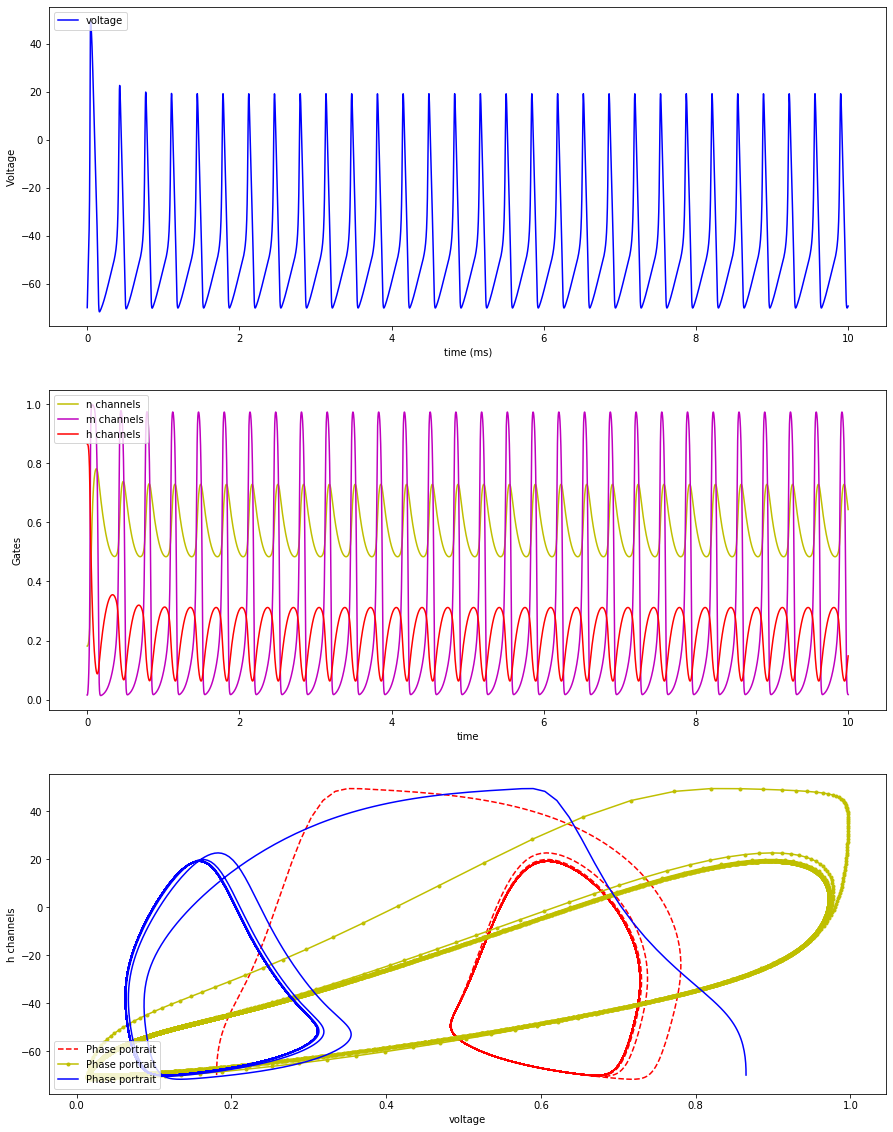

In [1]:
# Python 3.7.6 (default, Jan  8 2020, 16:21:45) [MSC v.1916 32 bit (Intel)]
# Yahya Ashrafi 981144
import numpy as np
import matplotlib.pyplot as plt


v = []
m = []
h = []
n = []
dt = 0.025
t = np.linspace(0,10,10000)


I = 50    # nanoAmpeire
Cm = 1.0 # micro F/Cm^2
ENa=50   # miliVolt
EK=-77   # miliVolt
El=-54.4 # miliVolt
g_Na=120 # mS/Cm^2
g_K=36   # mS/Cm^2
g_l=0.03 # mS/Cm^2


def alphaN(v):
    return 0.01*(v+50)/(1-np.exp(-(v+50)/10))

def betaN(v):
    return 0.125*np.exp(-(v+60)/80)

def alphaM(v):
    return 0.1*(v+35)/(1-np.exp(-(v+35)/10))

def betaM(v):
    return 4.0*np.exp(-0.0556*(v+60))

def alphaH(v):
    return 0.07*np.exp(-0.05*(v+60))

def betaH(v):
    return 1/(1+np.exp(-(0.1)*(v+30)))


v.append(-70)
m0 = alphaM(v[0])/(alphaM(v[0])+betaM(v[0]))
n0 = alphaN(v[0])/(alphaN(v[0])+betaN(v[0]))
h0 = alphaH(v[0])/(alphaH(v[0])+betaH(v[0]))


m.append(m0)
n.append(n0)
h.append(h0)

for i in range(1,len(t)):
    m.append(m[i-1] + dt*((alphaM(v[i-1])*(1-m[i-1]))-betaM(v[i-1])*m[i-1]))
    n.append(n[i-1] + dt*((alphaN(v[i-1])*(1-n[i-1]))-betaN(v[i-1])*n[i-1]))
    h.append(h[i-1] + dt*((alphaH(v[i-1])*(1-h[i-1]))-betaH(v[i-1])*h[i-1]))
    gNa = g_Na*(h[i-1])*(m[i-1])**3
    gK = g_K*n[i-1]**4
    gl = g_l
    INa = gNa*(v[i-1]-ENa)
    IK = gK*(v[i-1]-EK)
    Il = gl*(v[i-1]-El)
    v.append(v[i-1]+(dt)*((1/Cm)*(I-(INa+IK+Il))))


plt.figure(figsize=(15,20))
plt.legend(loc='upper left')
plt.title('Hodgkin Huxely Model Euler method')
plt.subplot(3,1,1)
plt.plot(t,v,'b-',label='voltage')
plt.legend(loc='upper left')
plt.xlabel('time (ms)')
plt.ylabel('Voltage')
plt.subplot(3,1,2)
plt.plot(t,n,'y-',label='n channels')
plt.legend(loc='upper left')
plt.xlabel('time')
plt.ylabel('n')
plt.subplot(3,1,2)
plt.plot(t,m,'m-',label='m channels')
plt.legend(loc='upper left')
plt.xlabel('time')
plt.ylabel('m')
plt.subplot(3,1,2)
plt.plot(t,h,'r-',label='h channels')
plt.legend(loc='upper left')
plt.xlabel('time')
plt.ylabel('Gates')
plt.subplot(3,1,3)
plt.plot(n,v,'r--',label='Phase portrait')
plt.legend(loc=3)
plt.xlabel('voltage')
plt.ylabel('n channels')
plt.subplot(3,1,3)
plt.plot(m,v,'y.-',label='Phase portrait')
plt.legend(loc=3)
plt.xlabel('voltage')
plt.ylabel('m channels')
plt.subplot(3,1,3)
plt.plot(h,v,'b-',label='Phase portrait')
plt.legend(loc=3)
plt.xlabel('voltage')
plt.ylabel('h channels')
plt.style.use('dark_background')
plt.savefig('HH model Euler method.png')
plt.show()
